# Turma #867 - Projeto Machine Learning I - Equipe 03
---


## Modelo Árvore de Decisão

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Carregando as Bases

In [2]:
#Base application_train

df_train = pd.read_csv("application_train.csv", encoding='latin1')
df_train=df_train.drop_duplicates()
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,456162,0,Cash loans,F,N,N,0,112500.0,700830.0,22738.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,134978,0,Cash loans,F,N,N,0,90000.0,375322.5,14422.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,318952,0,Cash loans,M,Y,N,0,180000.0,544491.0,16047.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,3.0
3,361264,0,Cash loans,F,N,Y,0,270000.0,814041.0,28971.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
4,260639,0,Cash loans,F,N,Y,0,144000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,10.0,0.0,0.0


In [3]:
df_valid=pd.read_csv("application_test_student.csv")
df_valid.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,149741,Cash loans,F,N,N,0,117000.0,417024.0,20191.5,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,363290,Cash loans,M,N,Y,0,450000.0,640080.0,31261.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,436006,Revolving loans,M,Y,Y,0,450000.0,900000.0,45000.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,377703,Cash loans,M,Y,N,1,360000.0,1125000.0,33025.5,1125000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,188624,Cash loans,M,Y,Y,0,675000.0,835380.0,42840.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


#### Ajustando a Base para o modelo e realizando EDA

In [4]:
#A base é um pouco desbalanceada, 
#existem menos pessoas inadimplentes
df_train.TARGET.value_counts()

0    226038
1     19970
Name: TARGET, dtype: int64

In [5]:
df=df_train[["NAME_EDUCATION_TYPE", "CODE_GENDER", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT", "TARGET"]]
df.head()

,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
0,Incomplete higher,F,-8676,2,2,0
1,Secondary / secondary special,F,-13583,2,2,0
2,Secondary / secondary special,M,-13993,2,2,0
3,Secondary / secondary special,F,-22425,1,1,0
4,Secondary / secondary special,F,-18839,2,2,0


In [6]:
df.describe()

,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,TARGET
count,246008.000000,246008.000000,246008.000000,246008.000000
mean,-16042.794393,2.031206,2.052092,0.081176
std,4365.973763,0.502715,0.509063,0.273106
min,-25229.000000,1.000000,1.000000,0.000000
25%,-19691.000000,2.000000,2.000000,0.000000
50%,-15763.000000,2.000000,2.000000,0.000000
75%,-12418.000000,2.000000,2.000000,0.000000
max,-7489.000000,3.000000,3.000000,1.000000


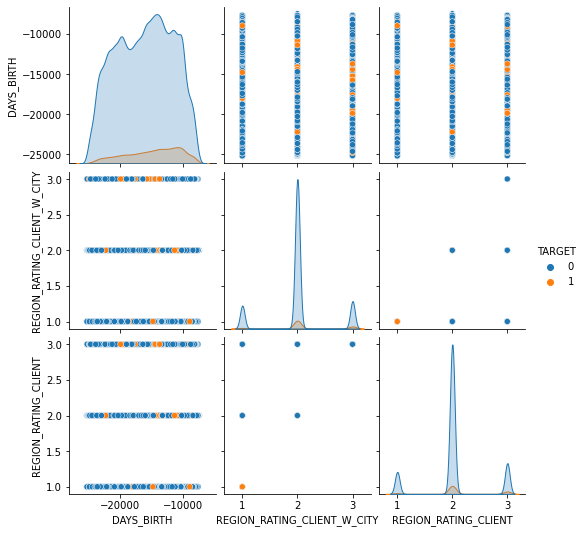

In [7]:
# visualização bivariada das variáveis selecionadas
sns.pairplot(df, hue='TARGET');

#### Aplicando o Modelo de Arvore de Decisao

 O modelo de Árvore de Decisão é um modelo supervisionado que se baseia na ideia de dividir os dados em grupos parecidos. Para dividir os dados da melhor forma possível ele encontra a variável que melhor realiza a divisão dos dados usando algumas técnicas como: Information Gain, Redução de Variância, Entropia, Gini e Chi-Square.

In [8]:
#Separo as colunas numericas e string
features = ["NAME_EDUCATION_TYPE", "CODE_GENDER", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT"]
var_expl = ["NAME_EDUCATION_TYPE", "CODE_GENDER"]
var_resp = ['TARGET']

In [9]:
#Separo a base em treino e teste

df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=4)

x_treino = df_treino[features].copy()
x_teste = df_teste[features].copy()

y_treino = df_treino[var_resp].copy()
y_teste = df_teste[var_resp].copy()

In [10]:
# Realizo o encoder nas colunas categorias com nomes para torna-las numericas pois o modelo aceita apenas
#entradas numericas

oe = OrdinalEncoder()
x_treino[var_expl] = oe.fit_transform(x_treino[var_expl])
x_teste[var_expl] = oe.transform(x_teste[var_expl])

print('treino:', x_treino.shape, y_treino.shape)
print('teste:', x_teste.shape, y_teste.shape)

treino: (196806, 5) (196806, 1)
teste: (49202, 5) (49202, 1)


In [11]:
#Treino o modelo dando um maior peso para a target 1 pois a base esta desbalanceada,
#Estabeleco max_depth como 4 e min_samples_split como 8000 pois a arvores estava muito grande
#Fazendo o modelo overfitar
modelo = DecisionTreeClassifier(class_weight={0: 1, 1: 9}, max_depth=4, min_samples_split =8000)
modelo.fit(x_treino, y_treino)

DecisionTreeClassifier(class_weight={0: 1, 1: 9}, max_depth=4,
                       min_samples_split=8000)

In [12]:
#Realizo a predicao nos dados de teste
y_teste_pred = modelo.predict_proba(x_teste)[:, 1]
y_pred = modelo.predict(x_teste)

#### Resultados

In [13]:
# calculo da acuracia
print("Acurácia",accuracy_score(y_teste, y_pred))
print("-------------")
print(classification_report(y_teste, y_pred))
print("------")
print("Area curva ROC:", roc_auc_score(y_teste, y_teste_pred))

Acurácia 0.6503800658509816
-------------
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     45189
           1       0.12      0.52      0.20      4013

    accuracy                           0.65     49202
   macro avg       0.53      0.59      0.49     49202
weighted avg       0.87      0.65      0.73     49202

------
Area curva ROC: 0.6222815086182016


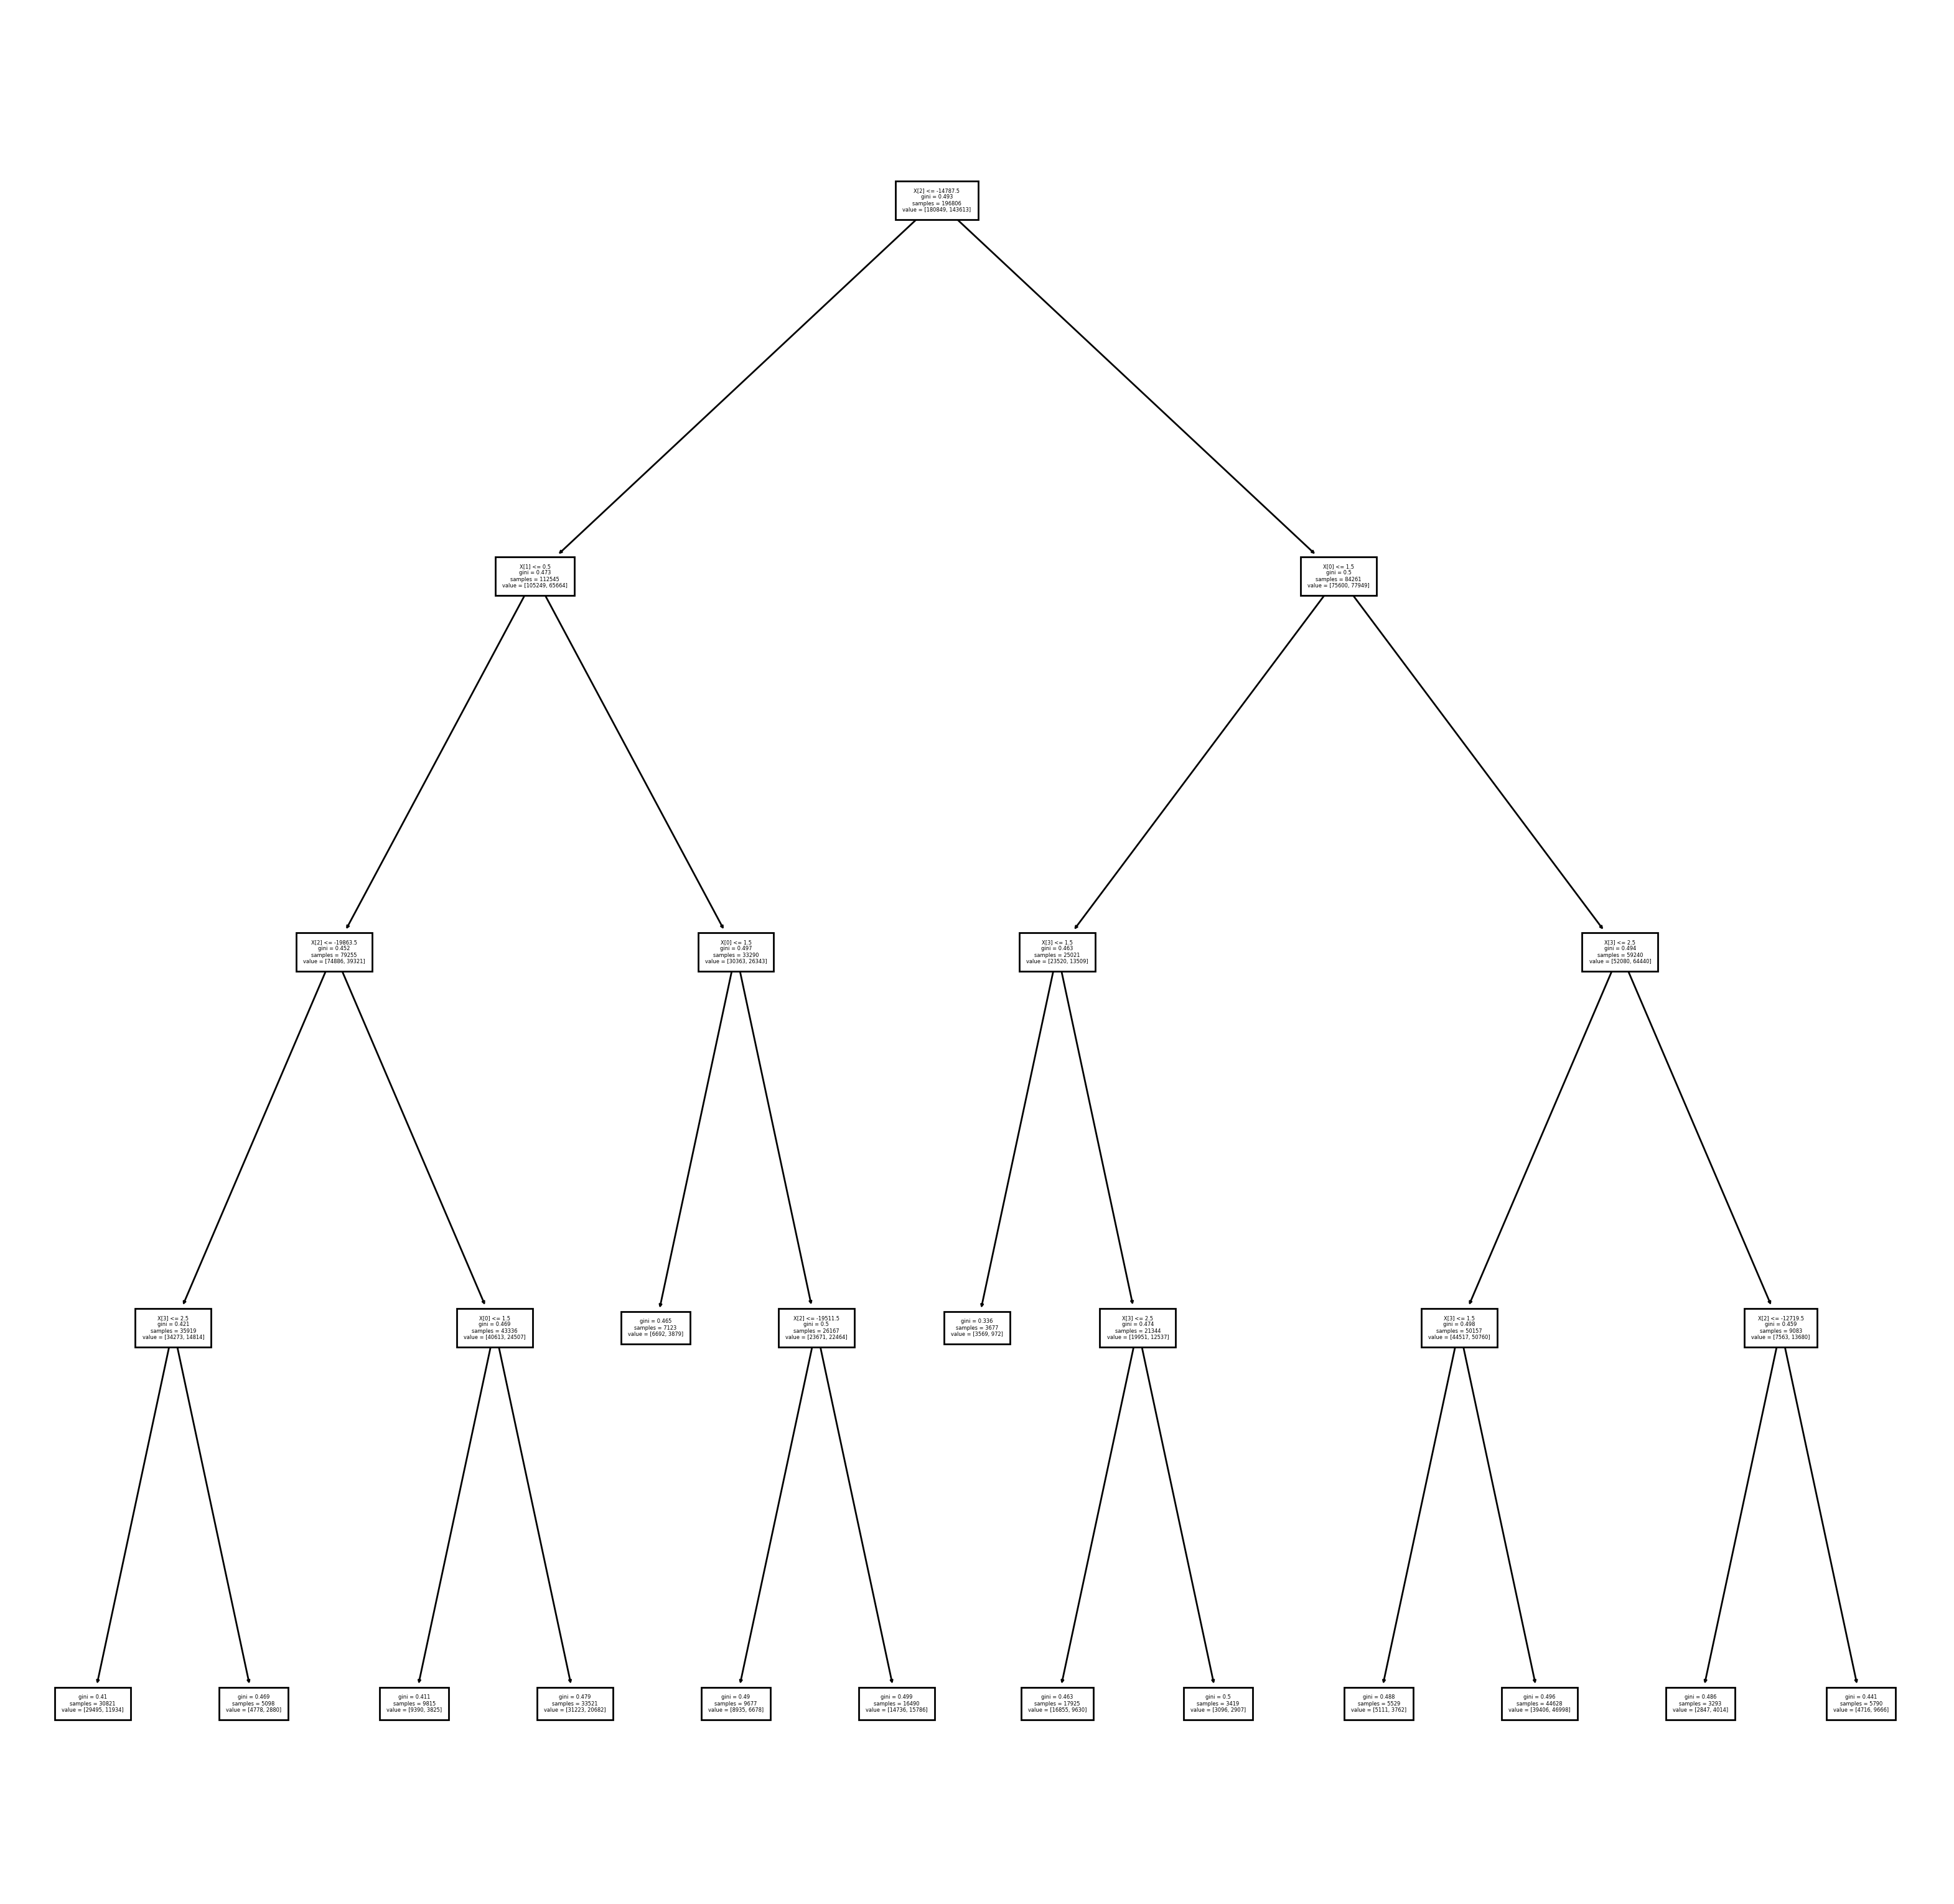

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (20, 20), dpi = 200)

plot_tree(modelo, fontsize = 3, ax = ax)

plt.show()

### Aplicando o modelo nos dados de teste

In [15]:
df_teste_model=df_valid[["NAME_EDUCATION_TYPE", "CODE_GENDER", "DAYS_BIRTH", "REGION_RATING_CLIENT_W_CITY", "REGION_RATING_CLIENT"]]
df_teste_model

,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT
0,Incomplete higher,F,-21774,3,3
1,Higher education,M,-18499,1,1
2,Higher education,M,-18084,2,2
3,Secondary / secondary special,M,-12319,2,2
4,Incomplete higher,M,-10151,2,3
...,...,...,...,...,...
61498,Secondary / secondary special,M,-17817,3,3
61499,Secondary / secondary special,M,-22836,3,3
61500,Secondary / secondary special,F,-20014,3,3
61501,Secondary / secondary special,F,-8201,2,2


In [16]:
#Aplico as mesmas transformações do Encoder de treino
df_teste_model[var_expl] = oe.transform(df_teste_model[var_expl])
df_teste_model

,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT
0,2.0,0.0,-21774,3,3
1,1.0,1.0,-18499,1,1
2,1.0,1.0,-18084,2,2
3,4.0,1.0,-12319,2,2
4,2.0,1.0,-10151,2,3
...,...,...,...,...,...
61498,4.0,1.0,-17817,3,3
61499,4.0,1.0,-22836,3,3
61500,4.0,0.0,-20014,3,3
61501,4.0,0.0,-8201,2,2


In [17]:
y_teste_pred = modelo.predict_proba(df_teste_model)[:, 1]
df_teste_model["PRED"] = y_teste_pred
df_teste_model

,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,PRED
0,2.0,0.0,-21774,3,3,0.376077
1,1.0,1.0,-18499,1,1,0.366947
2,1.0,1.0,-18084,2,2,0.366947
3,4.0,1.0,-12319,2,2,0.543933
4,2.0,1.0,-10151,2,3,0.543933
...,...,...,...,...,...,...
61498,4.0,1.0,-17817,3,3,0.517201
61499,4.0,1.0,-22836,3,3,0.427720
61500,4.0,0.0,-20014,3,3,0.376077
61501,4.0,0.0,-8201,2,2,0.543933


In [16]:
df_teste_model.to_csv('previsao_tree.csv', index=False)

---